In [94]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [95]:
# Load the dataset downloaded from Kaggle
data = pd.read_csv('ds_salaries.csv')

In [96]:
data

,work_year,experience_years,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,5,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,3,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,3,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,5,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,5,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,5,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,3,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,1,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,1,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [97]:
# Extract the features
features = ['experience_years', 'salary_in_usd']
X = data[features]

In [98]:
# Initialize the Isolation Forest model
model = IsolationForest(contamination=0.03)

In [99]:
# Fit the model to the data
model.fit(X)

IsolationForest(contamination=0.03)

In [100]:
# Predict the anomalies
predictions = model.predict(X)

In [101]:
# Create a new column in the dataframe to store the anomaly predictions
data['Anomaly'] = predictions

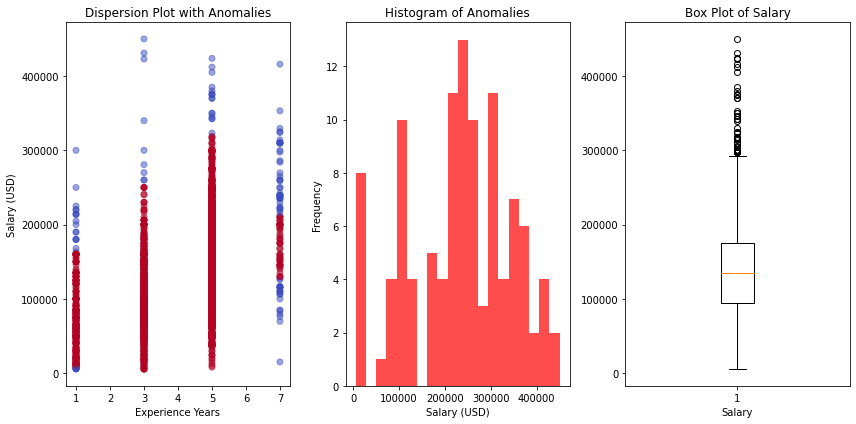

In [102]:
# Plot 1: Dispersion Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(data['experience_years'], data['salary_in_usd'], c=data['Anomaly'], cmap='coolwarm', alpha=0.5)
plt.xlabel('Experience Years')
plt.ylabel('Salary (USD)')
plt.title('Dispersion Plot with Anomalies')

# Plot 2: Histogram of Anomalies
plt.subplot(1, 3, 2)
plt.hist(data['salary_in_usd'][data['Anomaly'] == -1], bins=20, color='red', alpha=0.7)
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Anomalies')

# Plot 3: Box Plot of Salary
plt.subplot(1, 3, 3)
plt.boxplot(data['salary_in_usd'])
plt.xlabel('Salary')
plt.title('Box Plot of Salary')

# Adjust subplot spacing
plt.tight_layout()

# Show all the plots
plt.show()
